Figure 5 in Mahdavi & Siegel (2021) Indoor Air

This figure illustrates PM2.5 mass fractions in HVAC filter dust in terms of the measured PM2.5 HVAC filter efficiencies in ASHRAE RP-1649 filtration project.

Plot type: Scatter plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.container as container
import numpy as np
from scipy.stats import spearmanr
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [4]:
### Reading from the main dataframe (pm_master) and defining the x and y axes values

df_pm = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\pm_master.xlsx'))
df_pm = df_pm[['SN', 'site', 'round', 'ft', 'PM10', 'PM10 error', 'PM2.5', 'PM2.5 error']]

df_dc = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Processed\dc_1700_agg.xlsx'))
df_dc = df_dc[df_dc['stat'] == 0.5]
df = df_pm.merge(df_dc, on = ['site', 'round'], how = 'outer')

df_10 = df[((df['PM10 error']/df['PM10']) <= 0.75) & (df['PM10 error'] <= 25)]
df_25 = df[((df['PM2.5 error']/df['PM2.5']) <= 0.75) & (df['PM2.5 error'] <= 4)]

color_code = {1:'b',
              2:'r',
              3:'g',
              4:'k'}

marker_code = {1:'o',
               2:'s',
               3:'^',
               4:'D'}

label_code = {1:'8',
              2:'8E',
              3:'11',
              4:'14'}


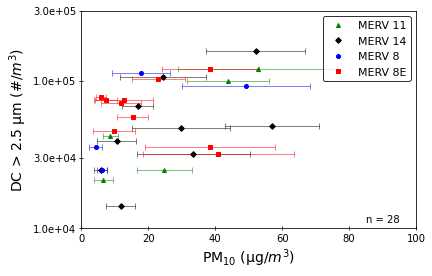

In [7]:
### Figure 6A

plt.figure()
for f in sorted(df_10['ft'].unique()):
    plt.errorbar(df_10[df_10['ft'] == f]['PM10'], 
                 df_10[df_10['ft'] == f]['DC > 2.5'],
                 xerr = [df_10[df_10['ft'] == f]['PM10 error'], 
                         df_10[df_10['ft'] == f]['PM10 error']],
                 yerr = None,
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)

    

plt.xlim(0, 100)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 101, step = 20))
plt.xlabel(r'PM$_{10}$ (µg/$m^{3}$)', size = 14) # FIX THIS


plt.yscale('log')
plt.ylim(10000, 300000)
a = [10000, 30000, 100000, 300000]
plt.yticks(ticks = a, labels = a)
plt.minorticks_off()
plt.ylabel('DC > 2.5 µm (#/$m^{3}$)', size = 14)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))


plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(90, 11500, 'n = ' + str(len(df_10)), ha = 'center', va = 'center', fontsize = 10)

plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_6a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


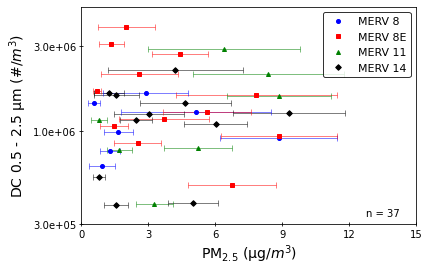

In [8]:
### Figure 6B

plt.figure()
for f in list(df_25['ft'].unique()):
    plt.errorbar(df_25[df_25['ft'] == f]['PM2.5'], 
                 df_25[df_25['ft'] == f]['DC 0.5-2.5'],
                 xerr = [df_25[df_25['ft'] == f]['PM2.5 error'], 
                         df_25[df_25['ft'] == f]['PM2.5 error']],
                 yerr = None,
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)

    

plt.xlim(0, 15)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 16, step = 3))
plt.xlabel(r'PM$_{2.5}$ (µg/$m^{3}$)', size = 14) # FIX THIS


plt.yscale('log')
plt.ylim(300000, 5000000)
a = [300000, 1000000, 3000000]
plt.yticks(ticks = a, labels = a)
plt.minorticks_off()
plt.ylabel('DC 0.5 - 2.5 µm (#/$m^{3}$)', size = 14)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))


plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(13.5, 345000, 'n = ' + str(len(df_25)), ha = 'center', va = 'center', fontsize = 10)
plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_6b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code